3. Variable Grouping

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12)

In [4]:
world = pd.read_csv("data/world.2.clean.csv")

In [5]:
world.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,gov_trust,generosity
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Categorical Variable Grouping 

In [7]:
def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(world)

country | uniques/records: 1.000 | Minimum observations: 1.000
region | uniques/records: 0.063 | Minimum observations: 2.000


In [8]:
world.region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let us also group contries and regions into what is considered developing or developed

In [9]:
world["development_level"] = "developing"

world["development_level"][world.region.isin([
    "Western Europe"
])] = "developed"

world["development_level"][world.country.isin([
    "United States", "Japan", "Canada",
    "Australia", "New Zealand", "South Korea"
])] = "developed"

/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
world.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,gov_trust,generosity,development_level
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,developed
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,developed
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,developed
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,developed
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,developed


Continuous Variable Grouping

In [15]:
happ_score_types = ["very low", "low",  "medium", "high"]

world["happ_score_types"] = pd.qcut(world['happiness_score'],
                                  4, happ_score_types)

In [16]:
rank_types = ["high", "medium",  "low", "very low"]

world["rank_types"] = pd.qcut(world['happiness_rank'],
                                  4, rank_types)

In [17]:
health_types = ["very low", "low",  "medium", "high"]

world["health_types"] = pd.qcut(world['health'],
                                  4, health_types)

In [18]:
world.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,gov_trust,generosity,development_level,happ_score_types,rank_types,health_types
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,developed,high,high,high
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,developed,high,high,high
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,developed,high,high,high
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,developed,high,high,high
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,developed,high,high,high


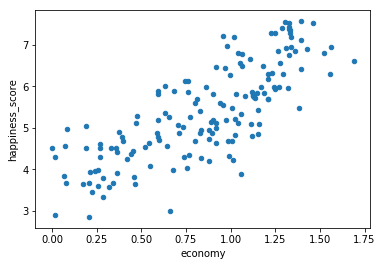

In [19]:
world.plot.scatter(x="economy", y="happiness_score")

As seen in the scatterplot, happiness and valuing the economy higher and having a higher GDP per capita have a positive correlation

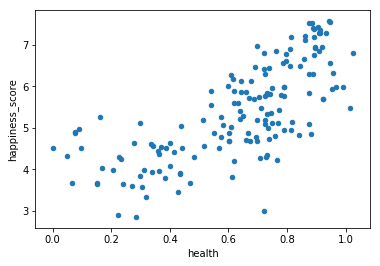

In [20]:
world.plot.scatter(x="health", y="happiness_score")

Health (life expectancy) has a greater positive correlation with the happiness score than the economy does

In [21]:
world.to_pickle("data/world.3.grouped.pkl")